# COURSERA CAPSTONE NOTEBOOK
## Characterizing U.S. cities by their pet venues

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## INTRODUCTION: Business Problem <a name="introduction"></a>

The American Pet Products Association (APPA) calculated that the total pet industry expenditures in the United States in the year 2018 was over 72 billion dollars. As of 2011, almost ¾ of U.S. households included a pet. What is more, pet expenditures are more resilient to economic downturns than many other household expenditures, making the pet industry a business market with high potential.


A company with a limited budget that plans to launch a new product, begin a marketing campaign, or open a new franchise location might would benefit from determining a narrow range of locations best suited for that purpose. 


The cities of the United States are a diverse mix and may have distinct characteristics in their cultural relationship to their pets. One way to study these characteristics is to look at the number and relative abundance of different types of pet businesses in different communities. Another measure of interest would be the overall density of pet related businesses. Yet another measure might be the relative frequency of participation in internet reviews of pet related businesses.


-------------------
-----------------

## DATA <a name="data"></a>

To address these questions, I will use recent statistics on U.S. cities such as population and land area. I will focus on cities with populations ranging from approximately 400,000 to 1,000,000 people with the idea such data will be of interest to companies focusing on mid-level markets. To address questions of pet business abundances and consumer participation in internet ratings, I will query data on pet businesses from both Foursquare and Yelp. 

#### First import necessary libraries

In [1]:
import pandas as pandas
import numpy as np

In [2]:
import requests
import json

In [3]:
import matplotlib as mpl

In [4]:
import matplotlib.pyplot as plt

-------------

### U.S. city data

#### Import a file that has population statistics for U.S. cities 
(downloaded from https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population, accessed May 6, 2019)

In [5]:
df_data_1 = pandas.read_json('Cities.json', orient='values')
df_data_1.head(2)

,10,11,2010Census,2016 land area,2016 population density,2017estimate,2017rank,Change,City,Location,State[c]
0,"10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W﻿...,"8,175,133",301.5 sq mi,780.9 km2,"8,622,698",1,+5.47%,New York City[d],"28,317/sq mi",New York
1,"3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°...,"3,792,621",468.7 sq mi,"1,213.9 km2","3,999,759",2,+5.46%,Los Angeles,"8,484/sq mi",California


In [6]:
#Explore cities with populations from ~400,000 to 1,000,000
df_data_1[9:47]


,10,11,2010Census,2016 land area,2016 population density,2017estimate,2017rank,Change,City,Location,State[c]
9,"2,231/km2",37°17′48″N 121°49′08″W﻿ / ﻿37.2967°N 121.8189°...,"945,942",177.5 sq mi,459.7 km2,"1,035,317",10,+9.45%,San Jose,"5,777/sq mi",California
10,"1,170/km2",30°18′14″N 97°45′16″W﻿ / ﻿30.3039°N 97.7544°W﻿...,"790,390",312.7 sq mi,809.9 km2,"950,715",11,+20.28%,Austin,"3,031/sq mi",Texas
11,455/km2,30°20′13″N 81°39′42″W﻿ / ﻿30.3369°N 81.6616°W﻿...,"821,784",747.4 sq mi,"1,935.8 km2","892,062",12,+8.55%,Jacksonville[f],"1,178/sq mi",Florida
12,"7,170/km2",37°43′38″N 123°01′56″W﻿ / ﻿37.7272°N 123.0322°...,"805,235",46.9 sq mi,121.5 km2,"884,363",13,+9.83%,San Francisco[g],"18,569/sq mi",California
13,"1,520/km2",39°59′07″N 82°59′05″W﻿ / ﻿39.9852°N 82.9848°W﻿...,"787,033",218.5 sq mi,565.9 km2,"879,170",14,+11.71%,Columbus,"3,936/sq mi",Ohio
14,962/km2,32°46′53″N 97°20′48″W﻿ / ﻿32.7815°N 97.3467°W﻿...,"741,206",342.9 sq mi,888.1 km2,"874,168",15,+17.94%,Fort Worth,"2,491/sq mi",Texas
15,914/km2,39°46′36″N 86°08′45″W﻿ / ﻿39.7767°N 86.1459°W﻿...,"820,445",361.5 sq mi,936.3 km2,"863,002",16,+5.19%,Indianapolis[h],"2,366/sq mi",Indiana
16,"1,064/km2",35°12′28″N 80°49′52″W﻿ / ﻿35.2078°N 80.8310°W﻿...,"731,424",305.4 sq mi,791.0 km2,"859,035",17,+17.45%,Charlotte,"2,757/sq mi",North Carolina
17,"3,245/km2",47°37′14″N 122°21′03″W﻿ / ﻿47.6205°N 122.3509°...,"608,660",83.8 sq mi,217.0 km2,"724,745",18,+19.07%,Seattle,"8,405/sq mi",Washington
18,"1,746/km2",39°45′43″N 104°52′52″W﻿ / ﻿39.7619°N 104.8811°...,"600,158",153.3 sq mi,397.0 km2,"704,621",19,+17.41%,Denver[i],"4,521/sq mi",Colorado


#### Create a dataframe with the subset of cities with populations between ~1,000,000 and 400,000

In [7]:
Cityset=df_data_1[9:47]
Cityset.shape

(38, 11)

In [8]:
#Create a list of the cities in the data set to loop through for searching for venues
cities=df_data_1.City[9:47]
cities

9                San Jose
10                 Austin
11        Jacksonville[f]
12       San Francisco[g]
13               Columbus
14             Fort Worth
15        Indianapolis[h]
16              Charlotte
17                Seattle
18              Denver[i]
19    Washington, D.C.[j]
20                 Boston
21                El Paso
22                Detroit
23           Nashville[k]
24                Memphis
25               Portland
26          Oklahoma City
27              Las Vegas
28          Louisville[l]
29           Baltimore[m]
30              Milwaukee
31            Albuquerque
32                 Tucson
33                 Fresno
34             Sacramento
35                   Mesa
36            Kansas City
37                Atlanta
38             Long Beach
39                  Omaha
40                Raleigh
41       Colorado Springs
42                  Miami
43      Virginia Beach[m]
44                Oakland
45            Minneapolis
46                  Tulsa
Name: City, 

#### Fix the name of some of the cities

In [9]:
cities[11,12,15,18,19,23,28,29,43]='Jacksonville','San Francisco','Indianapolis','Denver','Washington, D.C.','Nashville','Louisville','Baltimore','Virginia Beach'

In [10]:
cities

9             San Jose
10              Austin
11        Jacksonville
12       San Francisco
13            Columbus
14          Fort Worth
15        Indianapolis
16           Charlotte
17             Seattle
18              Denver
19    Washington, D.C.
20              Boston
21             El Paso
22             Detroit
23           Nashville
24             Memphis
25            Portland
26       Oklahoma City
27           Las Vegas
28          Louisville
29           Baltimore
30           Milwaukee
31         Albuquerque
32              Tucson
33              Fresno
34          Sacramento
35                Mesa
36         Kansas City
37             Atlanta
38          Long Beach
39               Omaha
40             Raleigh
41    Colorado Springs
42               Miami
43      Virginia Beach
44             Oakland
45         Minneapolis
46               Tulsa
Name: City, dtype: object

#### I will subset the city data with just the three values I will use: city name, land area, and population

In [11]:
CityData=Cityset[['City','2016 land area','2017estimate']] #start with city names, 2016 area, and 2017 population estimates

In [12]:
CityData.head()

,City,2016 land area,2017estimate
9,San Jose,177.5 sq mi,"1,035,317"
10,Austin,312.7 sq mi,"950,715"
11,Jacksonville,747.4 sq mi,"892,062"
12,San Francisco,46.9 sq mi,"884,363"
13,Columbus,218.5 sq mi,"879,170"


In [13]:
CityDataSorted=CityData.sort_values(by='City')

In [14]:
CityDataSorted.head()

,City,2016 land area,2017estimate
31,Albuquerque,188.2 sq mi,"558,545"
37,Atlanta,133.5 sq mi,"486,290"
10,Austin,312.7 sq mi,"950,715"
29,Baltimore,80.9 sq mi,"611,648"
20,Boston,48.3 sq mi,"685,094"


#### Check the data types in the dataframe

In [15]:
CityDataSorted.dtypes

City              object
2016 land area    object
2017estimate      object
dtype: object

#### *We can see that land area and population estimates will need to be converted to ints or floats*

#### Change land area and population column data type to float

In [16]:
Pops=CityDataSorted['2017estimate'].str.replace(",","").astype(float) #remove ',' from population listings and change data type to float

In [17]:
Pops[0:2]

31    558545.0
37    486290.0
Name: 2017estimate, dtype: float64

In [18]:
area=CityDataSorted['2016 land area'].str.replace('sq','').str.replace('mi','')
area=area.str.replace('\xa0','')
area=area.astype('float')

In [19]:
area[0:2]

31    188.2
37    133.5
Name: 2016 land area, dtype: float64

--------------------

### Foursquare data

#### Use Foursquare to retrieve dog runs in each of the cities

Note: I am fulfilling the requirement to use Foursquare data with this. I tried to use the category numbers to query Foursquare, but they did not return venues limited to the designated category. I will use Yelp to query by category because it worked. For the Foursquare query, I use the search term 'dog' to find all venues with 'dog' in their name. I will then subset the results to just the venues that are dog runs.

In [ ]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20190331'
LIMIT = 30
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [ ]:
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

In [ ]:
#Set constant values for intent, limit, query
intent = 'browse'
LIMIT = 400
query = 'dog'

In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
#create a list of column names and an empty dataframe to append Foursquare data
colDogs={'name':[],'categories':[],'id':[],'location.lat':[],'location.lng':[],'city':[]}
Dogs = pandas.DataFrame(data=colDogs)

In [ ]:
All_filt_col = ['name', 'categories','id', 'location.lat', 'location.lng']

for city in cities:
    near = city
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&near={}&v={}&intent={}&query={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, near, VERSION, intent, query, LIMIT)  
    
    allven = requests.get(url).json()
    Allven = allven['response']['venues']
    Allvendf = json_normalize(Allven)

    Allven_filtered = Allvendf.loc[:,All_filt_col ]

    # filter the category for each row
    Allven_filtered['categories'] = Allven_filtered.apply(get_category_type, axis=1)
    
    Allven_filtered['city']=city

    Dogs=Dogs.append(Allven_filtered, ignore_index=True)
    

In [ ]:
#Check the resulting dataframe
Dogs.head()

In [ ]:
#Find what categories of venues from the Foursquare query have the word 'dog' associated with it
Dogs.categories.unique()

#### *In Foursquare, searching with the term dog yields a lot of different venue types!*

In [ ]:
#Create a dataframe that includes only the subset of venues that are in the category dog run
DogRuns=Dogs[Dogs.categories=='Dog Run']

In [ ]:
#Save the dataframe so that the query will not need to be repeated
DogRuns.to_csv('DogRuns.csv',index=False)

In [20]:
#So that I don't have to redo the long query once it has been done, I will just import the saved csv
DogRuns=pandas.read_csv('DogRuns.csv')

In [23]:
#Check that the dataframe looks correct
DogRuns.head()

,name,categories,id,location.lat,location.lng,city
0,Dog Park,Dog Run,4de2a5ded4c07044057187f6,37.341687,-121.895235,San Jose
1,St. James Dog Park,Dog Run,5b1c09bb69e77b002ed7d8d7,37.339058,-121.890495,San Jose
2,Hart's Dog Park,Dog Run,5846095003e29a3ad382f531,37.334375,-121.893346,San Jose
3,Del Monte Dog Park,Dog Run,54c535ce498e215fadd1b984,37.320470,-121.903951,San Jose
4,Butcher Dog Park,Dog Run,4bddd11f587b2d7f36335509,37.259874,-121.917350,San Jose


In [21]:
freqDogRuns = pandas.crosstab(index=DogRuns["categories"], 
                           columns=DogRuns["city"])

freqDogRuns

city,Albuquerque,Atlanta,Austin,Baltimore,Boston,Charlotte,Colorado Springs,Columbus,Denver,Detroit,...,Portland,Raleigh,Sacramento,San Francisco,San Jose,Seattle,Tucson,Tulsa,Virginia Beach,"Washington, D.C."
categories,,,,,,,,,,,,,,,,,,,,,
Dog Run,6,15,10,8,14,11,3,13,13,3,...,11,11,8,14,15,14,9,3,10,7


---------------

### Yelp data

#### Use Yelp to retrieve venues related to pets in each of the cities

Note: I fulfilled the requirement to use Foursquare data by querying Foursquare for venues with the keyword 'dog'. I tried to use the category numbers to query Foursquare, but they did not return venues limited to the designated category. 

In [ ]:
api_key=''

In [ ]:
headers = {'Authorization': 'Bearer %s' % api_key}

In [ ]:
url='https://api.yelp.com/v3/businesses/search'

In [ ]:
#These are the categories that yelp has that are related to pets.
categories = ('animalphysicaltherapy', 'emergencypethospital', 'animalholistic', 'dogwalkers', 'pet_sitting', 'petwasteremoval','groomer', 'pet_training', 'petphotography', 'pettransport', 'petcremation', 'pethospice','petstore')

In [ ]:
#These are the characteristics of the venues which I will use in my analysis
save_columns = ['coordinates.latitude', 'coordinates.longitude', 'name','id', 'location.zip_code', 'rating', 'review_count']

#### Query loop
A complex for loop is required for this query because any empty results of a query would stop the loop, so a checkpoint is needed to determine if the json output is empty. If the json output is not empty, the loop continues. Also, Yelp has a maximum query limit of 50. To get more results than that requires a new query with an offset parameter. Therefore, after each non-empty query, if the result reached the max of 50 venues, subsequent queries wer done until the venues returned for a query were less than 50.

### **To my Coursera grader:**
I do not recommend that you re-do this query yourself. The loop runs for a very long time, and I had to try it several times for it to make it all the way through because of occassional lapses in the connection that stopped it. Also, you would have to create a Yelp account for yourself.

In [ ]:
#Create an empty dataframe with given column names to which query data can be appended
d={'coordinates.latitude':[],'coordinates.longitude':[],'name':[],'id':[],'rating':[],'review_count':[],'category':[],'city':[]}
pet_tableF = pandas.DataFrame(data=d)

In [ ]:
for city in cities:
    city=city
    for category in categories:
        d={'coordinates.latitude':[],'coordinates.longitude':[],'name':[],'id':[],'rating':[],'review_count':[],'category':[],'city':[]}
        pet_tablex = pandas.DataFrame(data=d)
        params={'categories':category, 'location':city, 'limit':50}
        req=requests.get(url, params=params, headers=headers)
        res=json.loads(req.text)
        result=pandas.io.json.json_normalize(res, 'businesses')
        if result.empty != True:
            pet_table = pandas.io.json.json_normalize(data=res['businesses'],  meta=['coordinates'])
            pet_tableB=pet_table.loc[:,save_columns]
            pet_tableB["category"]=category
            pet_tableB['city']=city
            pet_tablex=pet_tablex.append(pet_tableB, ignore_index=True, sort=True)
            x=len(pet_tablex)
            for i in range(1,15):
                if x >= 50*i:
                    offset = 50*i+1
                    params={'categories':category, 'location':city, 'limit':50, 'offset':offset}
                    req=requests.get(url, params=params, headers=headers)
                    res=json.loads(req.text)
                    result=pandas.io.json.json_normalize(res, 'businesses')
                    if result.empty != True:
                        pet_table = pandas.io.json.json_normalize(data=res['businesses'],  meta=['coordinates'])
                        pet_tableB=pet_table.loc[:,save_columns]
                        pet_tableB["category"]=category
                        pet_tableB['city']=city
                        pet_tablex=pet_tablex.append(pet_tableB, ignore_index=True, sort=True)
                        x=len(pet_tablex)              
            pet_tableF = pet_tableF.append(pet_tablex, ignore_index=True, sort=True)

In [ ]:
len(pet_tableF)

#### Save these results to file so that I won't have to repeat yelp query in future sessions

In [ ]:
pet_tableF.to_csv('pet_tableF.csv')

In [22]:
#If pet_table has already been generated, start here
pet_tableF = pandas.read_csv('pet_table2.csv')

In [23]:
#Check to see the table looks good
pet_tableF.head(3)

,category,city,coordinates.latitude,coordinates.longitude,id,location.zip_code,name,rating,review_count
0,animalphysicaltherapy,San Jose,37.274910,-121.951260,acI4bIT5iffwe6kB1WT01g,95008,SAGE Veterinary Centers,4.0,347
1,animalphysicaltherapy,San Jose,37.401730,-122.115740,JUC9uVyl5GyVZoQhepNF_Q,94022,"Kelly Thompson, DC",5.0,29
2,animalphysicaltherapy,San Jose,37.638693,-122.492225,eHbG1TtD3vwz3vruSApK1Q,94044,A Well Adjusted Pet,5.0,29


-----------------

### Combine the Foursquare dog run and Yelp pet venues to a single dataframe (with their shared columns)

In [24]:
pet_tableF.columns

Index(['category', 'city', 'coordinates.latitude', 'coordinates.longitude',
       'id', 'location.zip_code', 'name', 'rating', 'review_count'],
      dtype='object')

In [25]:
DogRuns.columns

Index(['name', 'categories', 'id', 'location.lat', 'location.lng', 'city'], dtype='object')

In [26]:
#I will rename the DogRuns columns to match the pet_table columns
DogRuns=DogRuns.rename(columns={'categories':'category', 'location.lat':'coordinates.latitude', 'location.lng':'coordinates.longitude'})

In [27]:
DogRuns.columns

Index(['name', 'category', 'id', 'coordinates.latitude',
       'coordinates.longitude', 'city'],
      dtype='object')

In [28]:
tempdf = pet_tableF[['name','category', 'id', 'coordinates.latitude', 'coordinates.longitude', 'city']]

In [29]:
tempdf.head()

,name,category,id,coordinates.latitude,coordinates.longitude,city
0,SAGE Veterinary Centers,animalphysicaltherapy,acI4bIT5iffwe6kB1WT01g,37.274910,-121.951260,San Jose
1,"Kelly Thompson, DC",animalphysicaltherapy,JUC9uVyl5GyVZoQhepNF_Q,37.401730,-122.115740,San Jose
2,A Well Adjusted Pet,animalphysicaltherapy,eHbG1TtD3vwz3vruSApK1Q,37.638693,-122.492225,San Jose
3,AquaDog Canine Swim Therapy,animalphysicaltherapy,_60STpjHyFr518rsrc20FA,37.213250,-121.970180,San Jose
4,Equi Kneads,animalphysicaltherapy,0NMUbdotGAfv-cAcAYtAfg,37.429310,-122.253098,San Jose


In [30]:
pet_table_combo = tempdf.append(DogRuns, ignore_index=True, sort=True)

In [31]:
pet_table_combo.tail()

,category,city,coordinates.latitude,coordinates.longitude,id,name
17611,Dog Run,Minneapolis,45.040144,-93.315411,4c37bd6793db0f47c2652092,Victory Dog Park
17612,Dog Run,Minneapolis,44.971876,-93.284017,4eceea3db8f7971d68e279e1,Loring Park Off-Leash Recreation Area
17613,Dog Run,Tulsa,36.028416,-95.911604,4b80f581f964a5205a9330e3,Biscuit Acres Dog Park
17614,Dog Run,Tulsa,36.072299,-95.857727,4c058e4d517d0f4747b8f415,Tulsa Dog Training Club
17615,Dog Run,Tulsa,36.151901,-96.017433,4b917e13f964a52094c033e3,Joe Station Bark Park


---------------------
---------------------

## METHODOLOGY <a name="methodology"></a>

I now have two dataframes as a source for analysis: one with statistics on the 38 U.S. cities with populations ranging from ~400,000 to ~1,000,000 and a second dataframe with venues related to pets in those citites.

I will first do some exploratory analysis of the frequency of different venue types in the cities, how many venues are listed under more than one category, what the most frequent venue type is for each city, and how many total venues each city has.

I will proceed with various analyses. Some of the analyses will use the full data table of venues that includes repeated entries for some venues, and some will be based on a subset of the data that contains only distinct venues. 


#### The yelp venues can be listed in more than one venue category and in more than one city

##### Quick check what the repeated venues look like

In [32]:
pet_tableTemp=pet_table_combo.sort_values(by='id', axis=0, ascending=True, inplace=False) #Create a dataframe sorted by venue ids
venrepeats = pet_tableTemp[pet_tableTemp.duplicated(['id'], keep=False)] #Create a dataframe with only venues listed more than once
venrepeats.head(6)

,category,city,coordinates.latitude,coordinates.longitude,id,name
2845,pet_sitting,Fort Worth,32.726463,-97.456345,#NAME?,Renay Bathing and Grooming
1186,petstore,Austin,30.312180,-97.738660,#NAME?,Kriser's Natural Pet
11631,petstore,Atlanta,33.880155,-84.378947,#NAME?,Puppy Haven - Chastain
17028,pet_training,Minneapolis,44.884571,-93.308243,#NAME?,Canine College
10910,pet_training,Mesa,33.604458,-111.990738,#NAME?,Partners Dog Training School
3625,dogwalkers,Seattle,47.541730,-122.390860,#NAME?,Leave It To Me Pet Care


In [33]:
venrepeats.tail(10)

,category,city,coordinates.latitude,coordinates.longitude,id,name
4307,dogwalkers,Denver,39.657850,-104.988540,zrzsFOaf_O97F3FADSEMSA,got woof?
14407,pet_sitting,Miami,25.733025,-80.330131,zs2N_jT4TdSTklf4WiwKbw,Silver Paws Dog Grooming
14556,groomer,Miami,25.733025,-80.330131,zs2N_jT4TdSTklf4WiwKbw,Silver Paws Dog Grooming
799,pet_sitting,Austin,30.486590,-97.766710,zv0pP_WJD7-yT3wWiooaqA,Reese's Pet Sitting
1134,pettransport,Austin,30.486590,-97.766710,zv0pP_WJD7-yT3wWiooaqA,Reese's Pet Sitting
648,dogwalkers,Austin,30.486590,-97.766710,zv0pP_WJD7-yT3wWiooaqA,Reese's Pet Sitting
4968,dogwalkers,"Washington, D.C.",38.916982,-77.047341,zv4kYng-3O3rThHvXxlmCA,Fetch! Pet Care
5244,pet_sitting,"Washington, D.C.",38.916982,-77.047341,zv4kYng-3O3rThHvXxlmCA,Fetch! Pet Care
16624,petphotography,Oakland,37.858959,-122.485558,zxkgyGQKBCWSZPREILz6cw,Mary Small Photography
2384,petphotography,San Francisco,37.858959,-122.485558,zxkgyGQKBCWSZPREILz6cw,Mary Small Photography


##### *There is a trouble that some businesses do not have an entry in the id column but instead have '#NAME?'. That means the id value alone cannot be used to remove repeats, the name will need to be used, too.*

##### Check how many entries there are without an id

In [34]:
df3=pet_table_combo[pet_table_combo['id']=='#NAME?']
df3.shape

(216, 6)

#### Create a second table that has only a single entry for each venue. This will be used in mapping and other analyses which need to have only a single instance of each venue

Because drop duplicates requires either the first or last repeated value be kept, I will first randomize the order of the rows so that venues that are listed in more than one city will be randomly assigned to only one of the cities. Another way to do those, which I am not doing, would to narrow the latitude and longitude values allowed for each city.

In [35]:
neworder=np.random.permutation(len(pet_table_combo))
pet_table_combo2=pet_table_combo.iloc[neworder]
UniqVenOnly = pet_table_combo2.drop_duplicates(subset=['id','name'], keep='first')

In [36]:
UniqVenOnly.head()

,category,city,coordinates.latitude,coordinates.longitude,id,name
16087,pet_sitting,Oakland,37.748540,-122.435570,sRJMkCSJgOVorYxP5DMnDg,Pawsitive Pet Services
15164,dogwalkers,Oakland,37.731804,-122.451988,MBDs0Rf88psV6-f6tUuVwA,Celtic Dog Walker
11349,pet_sitting,Atlanta,33.785957,-84.396210,sTWmxoK88cR4KyKavR6N1Q,Bark At the Ark Boarding & Groom
10387,pet_training,Sacramento,38.517818,-121.451798,LuOQEpCfJhhYg8L8IWcQUA,Jaimie Scott Dog Training
3061,pet_sitting,Indianapolis,39.722927,-86.147728,INag06syfTBIyDZJixO0yg,All Creatures Great and Groomed


In [37]:
#Save this to a file
UniqVenOnly.to_csv('UniqVenFullTable.csv')

In [40]:
UniqVenOnly.shape

(10645, 6)

In [38]:
#Check how many venues are unique
len(UniqVenOnly)

10645

In [39]:
#Calculate the percentage of venues that are listed more than once
print(round(100*(len(pet_table_combo)-len(UniqVenOnly))/len(pet_table_combo)),"% of venues are repeats")

40 % of venues are repeats


In [42]:
#Create a dataframe with the number of venues in each category for each city
freqtable = pandas.crosstab(index=UniqVenOnly["category"], 
                           columns=UniqVenOnly["city"])

freqtable

city,Albuquerque,Atlanta,Austin,Baltimore,Boston,Charlotte,Colorado Springs,Columbus,Denver,Detroit,...,Portland,Raleigh,Sacramento,San Francisco,San Jose,Seattle,Tucson,Tulsa,Virginia Beach,"Washington, D.C."
category,,,,,,,,,,,,,,,,,,,,,
Dog Run,6,15,10,8,14,11,3,13,13,3,...,11,11,8,14,15,14,9,3,10,7
animalholistic,0,2,2,4,5,2,2,3,5,2,...,3,1,4,2,3,6,0,0,1,2
animalphysicaltherapy,1,1,1,0,5,0,0,0,4,2,...,3,1,1,4,0,5,1,0,1,2
dogwalkers,7,48,58,35,142,20,7,10,62,7,...,57,17,18,151,48,111,7,1,9,130
emergencypethospital,1,4,3,7,11,5,5,2,8,7,...,4,0,7,2,2,7,0,1,2,10
groomer,44,55,46,67,98,35,40,51,101,14,...,77,37,57,34,71,57,46,33,34,101
pet_sitting,21,91,121,68,146,67,35,44,107,20,...,108,32,59,99,103,146,29,33,29,171
pet_training,13,29,59,22,73,22,25,26,71,8,...,51,18,47,44,63,62,18,8,13,95
petcremation,5,7,6,7,3,6,3,2,6,5,...,4,5,3,6,6,4,3,2,4,7


In [43]:
#Transpose frequency table
CityFreq=freqtable.T

In [44]:
CityFreq.head(2)

category,Dog Run,animalholistic,animalphysicaltherapy,dogwalkers,emergencypethospital,groomer,pet_sitting,pet_training,petcremation,pethospice,petphotography,petstore,pettransport,petwasteremoval
city,,,,,,,,,,,,,,
Albuquerque,6,0,1,7,1,44,21,13,5,0,5,29,0,3
Atlanta,15,2,1,48,4,55,91,29,7,1,5,38,5,4


------------------

#### Next, I'll explore the total number of entries per city, the number of unique venues, and the number of occurences of the most frequent venue.

In [46]:
#create a list of cities in the final table
cities_final=UniqVenOnly.city.unique()
    
#loop through the list of cities and create a list of the lengths of unique venues for each city
lu=[]
for i in cities_final:
    y=len(UniqVenOnly[UniqVenOnly.city == i].id.unique())
    lu.extend([y])

#find the count of the most abundant venue type for each city
ventypemax=[]
for i in cities_final:
    x=i
    y=freqtable[x].max()
    ventypemax.append(y)

In [47]:
#combine the list of cities, their total entries, and their unique venues into a dataframe
cols={'city':[],'lengthUniq':[], 'MaxVenVal':[]} #,'MaxVen':[]
citytotals = pandas.DataFrame(data=cols)
citytotals.city = cities_final
citytotals['lengthUniq'] = lu
citytotals['MaxVenVal'] = ventypemax
citytotals.head()

,city,lengthUniq,MaxVenVal
0,Oakland,853,256
1,Atlanta,304,91
2,Sacramento,269,59
3,Indianapolis,118,31
4,Long Beach,1238,351


#### Let's check which cities have the most unique venues and which have the least

In [48]:
CitiesRankedByVenNum=citytotals[['city','lengthUniq']].sort_values(by='lengthUniq', axis=0, ascending=False, inplace=False)
CitiesRankedByVenNum

,city,lengthUniq
4,Long Beach,1238
0,Oakland,853
14,"Washington, D.C.",604
5,Boston,579
9,Seattle,490
10,Denver,466
8,San Francisco,412
7,Portland,397
6,Austin,378
17,San Jose,369


In [49]:
CitiesRankedByVenNum.to_csv('RankByNum.csv',index=False)

#### *Long Beach and Oakland have many more venues than all others, followed by Washington, D.C., Boston, and Seattle.*

In [49]:
ratio=round(100*56/1237,1)
print('The city with the least venues, Memphis, has only', ratio,'% of the number of venues of Long Beach, the city with the most venues.')

The city with the least venues, Memphis, has only 4.5 % of the number of venues of Long Beach, the city with the most venues.


#### I'll make a plot of the number of unique pet venues in the cities analyzed

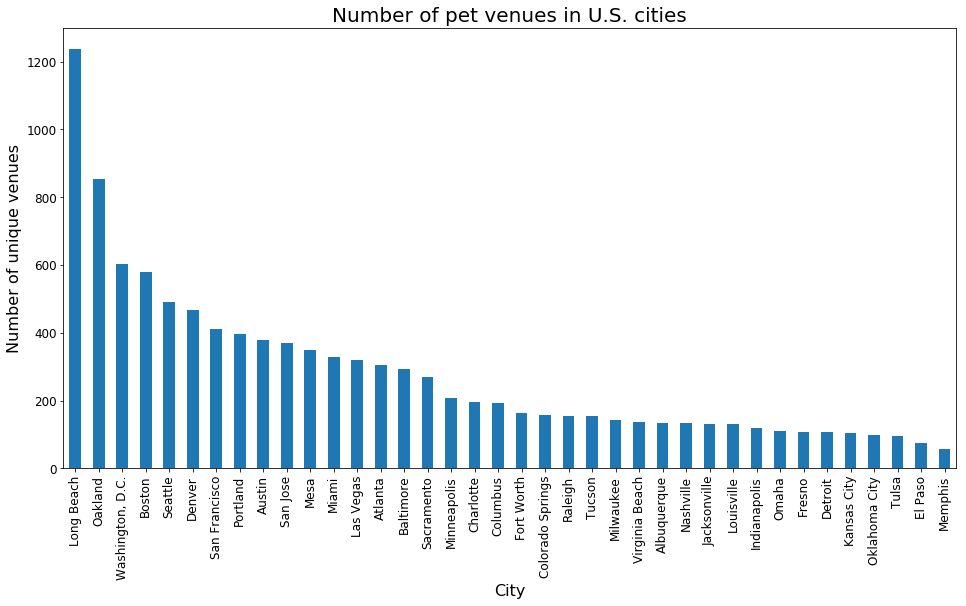

In [50]:
plt.close('all')
numplot=CitiesRankedByVenNum.plot(kind='bar',x='city',figsize=(16,9),legend=False, fontsize=12)
numplot.set_xlabel("City", fontsize=16)
numplot.set_ylabel('Number of unique venues', fontsize=16)
numplot.set_title('Number of pet venues in U.S. cities', fontsize=20)
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig('NumVen.png')

#### Let's just check what the most frequent venue types are for each city

In [51]:
MaxVen=freqtable.idxmax(axis=0)
MaxVen

city
Albuquerque             groomer
Atlanta             pet_sitting
Austin              pet_sitting
Baltimore           pet_sitting
Boston              pet_sitting
Charlotte           pet_sitting
Colorado Springs        groomer
Columbus                groomer
Denver              pet_sitting
Detroit             pet_sitting
El Paso                 groomer
Fort Worth              groomer
Fresno                  groomer
Indianapolis            groomer
Jacksonville            groomer
Kansas City         pet_sitting
Las Vegas               groomer
Long Beach              groomer
Louisville          pet_sitting
Memphis                 groomer
Mesa                    groomer
Miami                   groomer
Milwaukee               groomer
Minneapolis         pet_sitting
Nashville           pet_sitting
Oakland             pet_sitting
Oklahoma City           groomer
Omaha                   groomer
Portland            pet_sitting
Raleigh                 groomer
Sacramento          pet_sitting
San

In [53]:
MaxVen.value_counts()

groomer        20
pet_sitting    17
dogwalkers      1
dtype: int64

#### *We can see that pet sitters and groomers are the most abundant venues and that San Francisco is an outlier with dogwalkers  as the most abundant venue.*

### I will compile various calculations from the data

#### Some calculations based on reviews

In [54]:
#I'm collecting user ratings from the Yelp data of unique venues, again randomizing so that venues in duplicate cities are kept at random
neworder2=np.random.permutation(len(pet_tableF))
pet_tableF2=pet_tableF.iloc[neworder2]
UniqVenRatings = pet_tableF2.drop_duplicates(subset=['id','name'], keep='first')

In [55]:
#Calculate the mean of the venue ratings by city (using the dataframe containing just unique venue listings)
RatingMeanByCity=round(UniqVenRatings.groupby('city').mean()['rating'],2)

In [56]:
#Calculate the total review count by city (using the dataframe containing just unique venue listings)
ReviewsPerCity=UniqVenRatings.groupby('city').sum()['review_count']

In [57]:
ReviewsPerCity.head()

city
Albuquerque    1318
Atlanta        5215
Austin         8303
Baltimore      2974
Boston         8718
Name: review_count, dtype: int64

In [58]:
#Sort the citytotals dataframe from earlier to make adding new columns to it easier
SortedCityTotals=citytotals.sort_values(by='city', axis=0, ascending=True, inplace=False)

In [59]:
MeanRevPerVenPerCity=round(ReviewsPerCity/list(SortedCityTotals['lengthUniq']),1)

In [60]:
MeanRevPerVenPerCity.head()

city
Albuquerque     9.9
Atlanta        17.2
Austin         22.0
Baltimore      10.2
Boston         15.1
Name: review_count, dtype: float64

#### Now that several values have been calculated separately, combine them into a single dataframe

In [61]:
SortedCityTotals['RatingMeanByCity']=list(RatingMeanByCity)
SortedCityTotals['ReviewsPerCity']=list(ReviewsPerCity)
SortedCityTotals['MeanRevPerVenPerCity']=list(MeanRevPerVenPerCity)
SortedCityTotals['Population']=list(Pops)
SortedCityTotals['Area']=list(area)

In [62]:
SortedCityTotals.head()

,city,lengthUniq,MaxVenVal,RatingMeanByCity,ReviewsPerCity,MeanRevPerVenPerCity,Population,Area
27,Albuquerque,133,44,4.00,1318,9.9,558545.0,188.2
1,Atlanta,304,91,4.24,5215,17.2,486290.0,133.5
6,Austin,378,121,4.47,8303,22.0,950715.0,312.7
18,Baltimore,292,68,4.07,2974,10.2,611648.0,80.9
5,Boston,579,146,4.32,8718,15.1,685094.0,48.3


##### Add some more columns containing calculations

In [63]:
SortedCityTotals['VenuesPer10000']=SortedCityTotals['lengthUniq']/(SortedCityTotals['Population']/10000)

In [64]:
SortedCityTotals['VenuesPerSqMile']=SortedCityTotals['lengthUniq']/(SortedCityTotals['Area'])

In [65]:
SortedCityTotals['ReviewsPer10000']=SortedCityTotals['ReviewsPerCity']/(SortedCityTotals['Population']/10000)

In [66]:
SortedCityTotals['PopDensity']=SortedCityTotals['Population']/(SortedCityTotals['Area'])

In [67]:
SortedCityTotals.head()

,city,lengthUniq,MaxVenVal,RatingMeanByCity,ReviewsPerCity,MeanRevPerVenPerCity,Population,Area,VenuesPer10000,VenuesPerSqMile,ReviewsPer10000,PopDensity
27,Albuquerque,133,44,4.00,1318,9.9,558545.0,188.2,2.381187,0.706695,23.597024,2967.826780
1,Atlanta,304,91,4.24,5215,17.2,486290.0,133.5,6.251414,2.277154,107.240535,3642.621723
6,Austin,378,121,4.47,8303,22.0,950715.0,312.7,3.975955,1.208826,87.334269,3040.342181
18,Baltimore,292,68,4.07,2974,10.2,611648.0,80.9,4.773988,3.609394,48.622737,7560.543881
5,Boston,579,146,4.32,8718,15.1,685094.0,48.3,8.451395,11.987578,127.252611,14184.140787


In [68]:
Factors=SortedCityTotals[['city','lengthUniq','RatingMeanByCity','ReviewsPerCity','MeanRevPerVenPerCity','VenuesPer10000','VenuesPerSqMile','ReviewsPer10000','PopDensity']]

In [69]:
Factors=Factors.set_index('city')
Factors.head()

,lengthUniq,RatingMeanByCity,ReviewsPerCity,MeanRevPerVenPerCity,VenuesPer10000,VenuesPerSqMile,ReviewsPer10000,PopDensity
city,,,,,,,,
Albuquerque,133,4.00,1318,9.9,2.381187,0.706695,23.597024,2967.826780
Atlanta,304,4.24,5215,17.2,6.251414,2.277154,107.240535,3642.621723
Austin,378,4.47,8303,22.0,3.975955,1.208826,87.334269,3040.342181
Baltimore,292,4.07,2974,10.2,4.773988,3.609394,48.622737,7560.543881
Boston,579,4.32,8718,15.1,8.451395,11.987578,127.252611,14184.140787


In [70]:
PopDen=Factors.sort_values(by='PopDensity', axis=0, ascending=False, inplace=False)
FacByVenPop=Factors.sort_values(by='VenuesPer10000', axis=0, ascending=False, inplace=False)
FacByRevPerVen=Factors.sort_values(by='MeanRevPerVenPerCity', axis=0, ascending=False, inplace=False)
FacRatByCity=Factors.sort_values(by='RatingMeanByCity', axis=0, ascending=False, inplace=False)
FacByVenDen=Factors.sort_values(by='VenuesPerSqMile', axis=0, ascending=False, inplace=False)
FacRevPerCity=Factors.sort_values(by='ReviewsPerCity', axis=0, ascending=False, inplace=False)
FacByVenRev=Factors.sort_values(by='ReviewsPer10000', axis=0, ascending=False, inplace=False)

In [71]:
TopTable=pandas.DataFrame()
TopTable['Population density']=PopDen.index.tolist()
TopTable['Reviews per city']=FacRevPerCity.index.tolist()
TopTable['Mean venue rating per city']=FacRatByCity.index.tolist()
TopTable['Venues per person']=FacByVenPop.index.tolist()
TopTable['Venues per square mile']=FacByVenDen.index.tolist()
TopTable['Reviews per person']=FacByVenRev.index.tolist()
TopTable['Reviews per venue']=FacByRevPerVen.index.tolist()

In [72]:
TopTable.iloc[:10]

,Population density,Reviews per city,Mean venue rating per city,Venues per person,Venues per square mile,Reviews per person,Reviews per venue
0,San Francisco,Long Beach,San Francisco,Long Beach,Long Beach,Long Beach,San Jose
1,Boston,Oakland,Oakland,Oakland,Oakland,Oakland,Long Beach
2,Miami,San Jose,Seattle,"Washington, D.C.",Boston,"Washington, D.C.",Las Vegas
3,"Washington, D.C.",San Francisco,Long Beach,Boston,"Washington, D.C.",Las Vegas,Oakland
4,Long Beach,"Washington, D.C.",San Jose,Miami,Miami,Sacramento,San Francisco
5,Seattle,Las Vegas,Austin,Mesa,San Francisco,San Jose,Sacramento
6,Minneapolis,Seattle,Mesa,Seattle,Seattle,Seattle,Seattle
7,Oakland,Boston,Portland,Denver,Minneapolis,San Francisco,Austin
8,Baltimore,Sacramento,Sacramento,Atlanta,Baltimore,Mesa,"Washington, D.C."
9,Milwaukee,Austin,Denver,Portland,Denver,Boston,Portland


In [73]:
TopTable.to_csv('TopTable.csv',index=False)

----------
---------

## ANALYSIS <a name="analysis"></a>

#### Are the number of venues positively related to the population of cities?

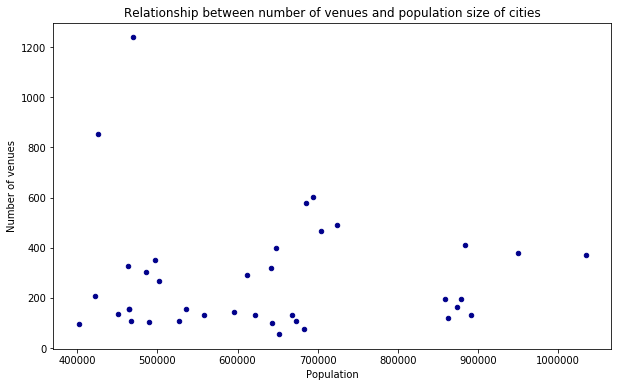

In [74]:
plt.close('all')
SortedCityTotals.plot(kind='scatter', x='Population', y='lengthUniq', figsize=(10, 6), color='darkblue')

plt.title('Relationship between number of venues and population size of cities')
plt.xlabel('Population')
plt.ylabel('Number of venues')

plt.savefig('VenByPop.png')

#### *There does not appear to be a positive, linear relationship between number of venues and city population.*
Linear regression was not done as the non-relationship is so visually apparent. What is apparent is the two strong outliers, with low populations but with the highest number of venues.

### Clustering of cities by venue traits

#### First I will create a frequency table of venue types to use for clustering

In [75]:
citysums=freqtable.iloc[:,0:38].sum()

In [76]:
VenFrqDf=freqtable.iloc[:,0:38].div(citysums)

In [77]:
VenFrqDf

city,Albuquerque,Atlanta,Austin,Baltimore,Boston,Charlotte,Colorado Springs,Columbus,Denver,Detroit,...,Portland,Raleigh,Sacramento,San Francisco,San Jose,Seattle,Tucson,Tulsa,Virginia Beach,"Washington, D.C."
category,,,,,,,,,,,,,,,,,,,,,
Dog Run,0.044444,0.049180,0.026178,0.026936,0.023769,0.056122,0.018868,0.065990,0.027837,0.028037,...,0.027363,0.070968,0.029520,0.033816,0.040107,0.028283,0.058065,0.030928,0.072993,0.011438
animalholistic,0.000000,0.006557,0.005236,0.013468,0.008489,0.010204,0.012579,0.015228,0.010707,0.018692,...,0.007463,0.006452,0.014760,0.004831,0.008021,0.012121,0.000000,0.000000,0.007299,0.003268
animalphysicaltherapy,0.007407,0.003279,0.002618,0.000000,0.008489,0.000000,0.000000,0.000000,0.008565,0.018692,...,0.007463,0.006452,0.003690,0.009662,0.000000,0.010101,0.006452,0.000000,0.007299,0.003268
dogwalkers,0.051852,0.157377,0.151832,0.117845,0.241087,0.102041,0.044025,0.050761,0.132762,0.065421,...,0.141791,0.109677,0.066421,0.364734,0.128342,0.224242,0.045161,0.010309,0.065693,0.212418
emergencypethospital,0.007407,0.013115,0.007853,0.023569,0.018676,0.025510,0.031447,0.010152,0.017131,0.065421,...,0.009950,0.000000,0.025830,0.004831,0.005348,0.014141,0.000000,0.010309,0.014599,0.016340
groomer,0.325926,0.180328,0.120419,0.225589,0.166384,0.178571,0.251572,0.258883,0.216274,0.130841,...,0.191542,0.238710,0.210332,0.082126,0.189840,0.115152,0.296774,0.340206,0.248175,0.165033
pet_sitting,0.155556,0.298361,0.316754,0.228956,0.247878,0.341837,0.220126,0.223350,0.229122,0.186916,...,0.268657,0.206452,0.217712,0.239130,0.275401,0.294949,0.187097,0.340206,0.211679,0.279412
pet_training,0.096296,0.095082,0.154450,0.074074,0.123939,0.112245,0.157233,0.131980,0.152034,0.074766,...,0.126866,0.116129,0.173432,0.106280,0.168449,0.125253,0.116129,0.082474,0.094891,0.155229
petcremation,0.037037,0.022951,0.015707,0.023569,0.005093,0.030612,0.018868,0.010152,0.012848,0.046729,...,0.009950,0.032258,0.011070,0.014493,0.016043,0.008081,0.019355,0.020619,0.029197,0.011438


In [78]:
#The dataframe needs to be transposed for cluster analysis
VenFrqDfK=VenFrqDf.T 

In [79]:
VenFrqDfK.head(4)

category,Dog Run,animalholistic,animalphysicaltherapy,dogwalkers,emergencypethospital,groomer,pet_sitting,pet_training,petcremation,pethospice,petphotography,petstore,pettransport,petwasteremoval
city,,,,,,,,,,,,,,
Albuquerque,0.044444,0.000000,0.007407,0.051852,0.007407,0.325926,0.155556,0.096296,0.037037,0.000000,0.037037,0.214815,0.000000,0.022222
Atlanta,0.049180,0.006557,0.003279,0.157377,0.013115,0.180328,0.298361,0.095082,0.022951,0.003279,0.016393,0.124590,0.016393,0.013115
Austin,0.026178,0.005236,0.002618,0.151832,0.007853,0.120419,0.316754,0.154450,0.015707,0.010471,0.041885,0.117801,0.015707,0.013089
Baltimore,0.026936,0.013468,0.000000,0.117845,0.023569,0.225589,0.228956,0.074074,0.023569,0.006734,0.016835,0.161616,0.070707,0.010101


In [80]:
import seaborn as sns

#### I will use several clustering methods to group cities by venue type frequency. First, hierarchical clustering 

In [81]:
from scipy.cluster import hierarchy

In [82]:
#I am re-ordering the columns so that the most frequent venues are on the right in the resulting figure
VenFrqDfK2=VenFrqDfK[['animalholistic','animalphysicaltherapy','petcremation','pethospice','petphotography','petwasteremoval','pettransport','Dog Run','petstore','pet_training','groomer','dogwalkers','pet_sitting']]

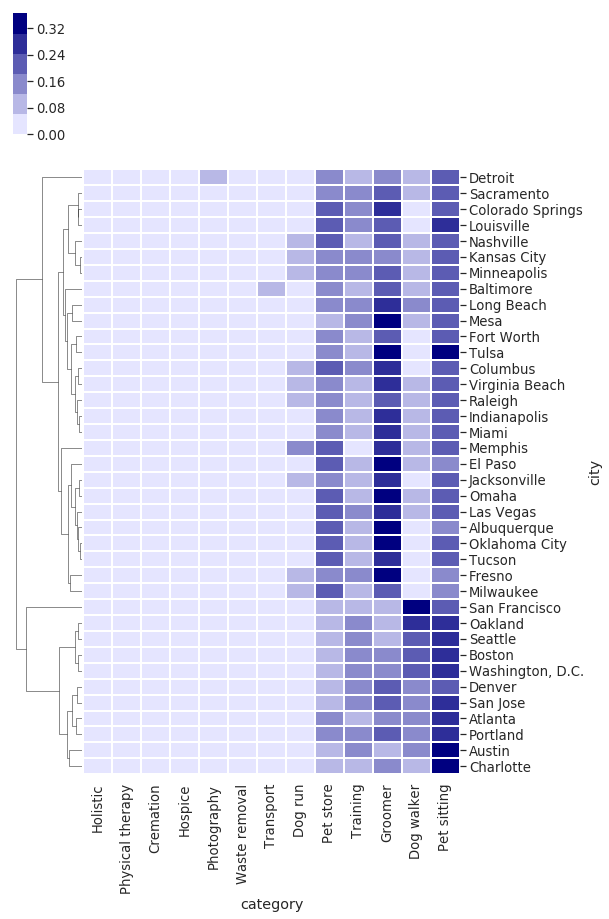

In [83]:
sns.set(font_scale=1.2)
heatmatvenue = sns.clustermap(VenFrqDfK2,metric='correlation', col_cluster=False, cmap=sns.light_palette("navy"), figsize=(8,14), linewidths=1,xticklabels=('Holistic','Physical therapy','Cremation','Hospice','Photography','Waste removal','Transport','Dog run', 'Pet store','Training','Groomer','Dog walker','Pet sitting'))

In [84]:
heatmatvenue.savefig("VenueFreqHeatmap.png")

#### Next I will use a hierarchical, agglomerative clustering method using the Ward metric.

In [85]:
Z=hierarchy.linkage(VenFrqDfK,'ward')

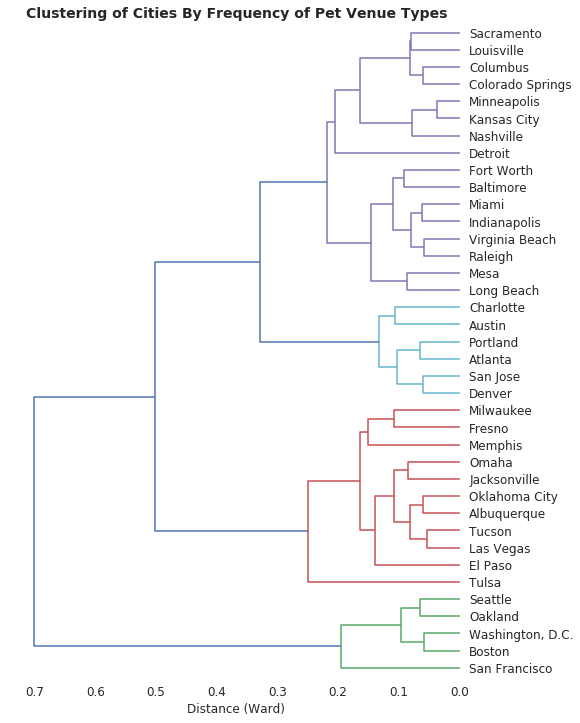

In [86]:
plt.close('all')
plt.figure(figsize=(8,12))
plt.rcParams['axes.facecolor'] = 'white'

plt.title('Clustering of Cities By Frequency of Pet Venue Types', fontsize=14, fontweight='bold')
plt.xlabel('Distance (Ward)', fontsize=12)
plt.tick_params(axis='x',labelsize=12)

hierarchy.dendrogram(Z, orientation='left', color_threshold=0.3,labels=VenFrqDfK.index, leaf_font_size=12)
#DendVenFreq=plt.gca()
plt.savefig('Clus.png',bbox_inches='tight')
plt.show()

#### Now I will try KMeans clustering

In [87]:
from sklearn.cluster import KMeans

#### Based on the abover clustering, I will chose to create 4 clusters

In [88]:
num_clusters = 4

k_means4 = KMeans(init="k-means++", n_clusters=num_clusters, n_init=20)
k_means4.fit(VenFrqDfK2)
labels = k_means4.labels_

In [89]:
labels

array([2, 1, 1, 0, 3, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0,
       2, 0, 0, 3, 2, 2, 1, 0, 0, 3, 1, 3, 2, 2, 0, 3], dtype=int32)

In [90]:
VenFrqDfK2["Labels"] = labels #Add a column with the cluster assignments to the data frame

--------------
--------------

## RESULTS <a name="results"></a>

In [91]:
#Check how many cities are in each cluster
VenFrqDfK2["Labels"].value_counts().to_frame()

,Labels
0,17
2,11
3,5
1,5


In [92]:
VenFrqDfK2[VenFrqDfK2.Labels==0]

category,animalholistic,animalphysicaltherapy,petcremation,pethospice,petphotography,petwasteremoval,pettransport,Dog Run,petstore,pet_training,groomer,dogwalkers,pet_sitting,Labels
city,,,,,,,,,,,,,,
Baltimore,0.013468,0.000000,0.023569,0.006734,0.016835,0.010101,0.070707,0.026936,0.161616,0.074074,0.225589,0.117845,0.228956,0
Colorado Springs,0.012579,0.000000,0.018868,0.000000,0.025157,0.018868,0.012579,0.018868,0.188679,0.157233,0.251572,0.044025,0.220126,0
Columbus,0.015228,0.000000,0.010152,0.005076,0.025381,0.015228,0.005076,0.065990,0.182741,0.131980,0.258883,0.050761,0.223350,0
Denver,0.010707,0.008565,0.012848,0.006424,0.049251,0.010707,0.008565,0.027837,0.117773,0.152034,0.216274,0.132762,0.229122,0
Detroit,0.018692,0.018692,0.046729,0.056075,0.065421,0.046729,0.037383,0.028037,0.158879,0.074766,0.130841,0.065421,0.186916,0
Fort Worth,0.011976,0.011976,0.035928,0.035928,0.017964,0.041916,0.041916,0.029940,0.131737,0.089820,0.227545,0.059880,0.215569,0
Indianapolis,0.008333,0.008333,0.041667,0.000000,0.041667,0.016667,0.008333,0.033333,0.133333,0.091667,0.258333,0.091667,0.225000,0
Kansas City,0.018868,0.000000,0.018868,0.009434,0.047170,0.009434,0.018868,0.075472,0.160377,0.141509,0.169811,0.094340,0.216981,0
Long Beach,0.007223,0.008828,0.012841,0.003210,0.057785,0.008828,0.009631,0.008828,0.129213,0.138042,0.281701,0.124398,0.201445,0


In [93]:
VenFrqDfK2[VenFrqDfK2.Labels==1]

category,animalholistic,animalphysicaltherapy,petcremation,pethospice,petphotography,petwasteremoval,pettransport,Dog Run,petstore,pet_training,groomer,dogwalkers,pet_sitting,Labels
city,,,,,,,,,,,,,,
Atlanta,0.006557,0.003279,0.022951,0.003279,0.016393,0.013115,0.016393,0.049180,0.124590,0.095082,0.180328,0.157377,0.298361,1
Austin,0.005236,0.002618,0.015707,0.010471,0.041885,0.013089,0.015707,0.026178,0.117801,0.154450,0.120419,0.151832,0.316754,1
Charlotte,0.010204,0.000000,0.030612,0.015306,0.015306,0.015306,0.000000,0.056122,0.096939,0.112245,0.178571,0.102041,0.341837,1
Portland,0.007463,0.007463,0.009950,0.004975,0.027363,0.009950,0.007463,0.027363,0.159204,0.126866,0.191542,0.141791,0.268657,1
San Jose,0.008021,0.000000,0.016043,0.005348,0.037433,0.008021,0.005348,0.040107,0.112299,0.168449,0.189840,0.128342,0.275401,1


In [94]:
VenFrqDfK2[VenFrqDfK2.Labels==2]

category,animalholistic,animalphysicaltherapy,petcremation,pethospice,petphotography,petwasteremoval,pettransport,Dog Run,petstore,pet_training,groomer,dogwalkers,pet_sitting,Labels
city,,,,,,,,,,,,,,
Albuquerque,0.000000,0.007407,0.037037,0.000000,0.037037,0.022222,0.000000,0.044444,0.214815,0.096296,0.325926,0.051852,0.155556,2
El Paso,0.000000,0.000000,0.000000,0.013514,0.040541,0.000000,0.013514,0.040541,0.216216,0.067568,0.364865,0.067568,0.121622,2
Fresno,0.000000,0.000000,0.000000,0.009434,0.018868,0.009434,0.009434,0.103774,0.179245,0.160377,0.311321,0.037736,0.150943,2
Jacksonville,0.007576,0.007576,0.015152,0.015152,0.037879,0.015152,0.015152,0.075758,0.143939,0.090909,0.303030,0.045455,0.204545,2
Las Vegas,0.006231,0.006231,0.012461,0.009346,0.018692,0.018692,0.012461,0.028037,0.183801,0.127726,0.302181,0.062305,0.190031,2
Memphis,0.000000,0.035714,0.017857,0.000000,0.000000,0.017857,0.017857,0.125000,0.196429,0.035714,0.267857,0.071429,0.196429,2
Milwaukee,0.000000,0.000000,0.013889,0.020833,0.041667,0.006944,0.020833,0.083333,0.229167,0.111111,0.243056,0.048611,0.145833,2
Oklahoma City,0.000000,0.000000,0.020000,0.000000,0.020000,0.020000,0.000000,0.040000,0.230000,0.090000,0.330000,0.030000,0.200000,2
Omaha,0.000000,0.000000,0.000000,0.009174,0.027523,0.009174,0.018349,0.045872,0.183486,0.073394,0.357798,0.064220,0.211009,2


In [95]:
VenFrqDfK2[VenFrqDfK2.Labels==3]

category,animalholistic,animalphysicaltherapy,petcremation,pethospice,petphotography,petwasteremoval,pettransport,Dog Run,petstore,pet_training,groomer,dogwalkers,pet_sitting,Labels
city,,,,,,,,,,,,,,
Boston,0.008489,0.008489,0.005093,0.011885,0.023769,0.005093,0.008489,0.023769,0.106961,0.123939,0.166384,0.241087,0.247878,3
Oakland,0.005767,0.003460,0.001153,0.003460,0.047290,0.004614,0.006920,0.008074,0.087659,0.125721,0.121107,0.276817,0.295271,3
San Francisco,0.004831,0.009662,0.014493,0.007246,0.050725,0.007246,0.009662,0.033816,0.065217,0.106280,0.082126,0.364734,0.239130,3
Seattle,0.012121,0.010101,0.008081,0.002020,0.036364,0.006061,0.008081,0.028283,0.115152,0.125253,0.115152,0.224242,0.294949,3
"Washington, D.C.",0.003268,0.003268,0.011438,0.008170,0.016340,0.008170,0.017974,0.011438,0.091503,0.155229,0.165033,0.212418,0.279412,3


#### I will look at both medians and means of venue frequencies in each cluster

In [96]:
#Create a table that shows median frequency for each venue type for each cluster
venuet=list(VenFrqDfK2[VenFrqDfK2.Labels==0])
medianC0=list(VenFrqDfK2[VenFrqDfK2.Labels==0].median())
medianC1=list(VenFrqDfK2[VenFrqDfK2.Labels==1].median())
medianC2=list(VenFrqDfK2[VenFrqDfK2.Labels==2].median())
medianC3=list(VenFrqDfK2[VenFrqDfK2.Labels==3].median())
medianAll=pandas.DataFrame()
medianAll['Venues']=venuet
medianAll['Cluster0']=medianC0
medianAll['Cluster1']=medianC1
medianAll['Cluster2']=medianC2
medianAll['Cluster3']=medianC3
MedianAll=medianAll[0:13]
MedianAll=MedianAll.set_index('Venues')
MedianAll.sort_values(by='Cluster0', axis=0, ascending=False, inplace=False)

,Cluster0,Cluster1,Cluster2,Cluster3
Venues,,,,
groomer,0.238462,0.180328,0.311321,0.121107
pet_sitting,0.216981,0.298361,0.190031,0.279412
petstore,0.153285,0.117801,0.196429,0.091503
pet_training,0.125356,0.126866,0.090909,0.125253
dogwalkers,0.085470,0.141791,0.048611,0.241087
petphotography,0.034188,0.027363,0.025806,0.036364
Dog Run,0.033333,0.040107,0.045872,0.023769
petcremation,0.018868,0.016043,0.015152,0.008081
pettransport,0.015244,0.007463,0.013514,0.008489


In [97]:
MedianAll.to_csv('Cluster_Medians.csv')

In [122]:
#Create a table that shows mean frequency for each venue type for each cluster
venuet=list(VenFrqDfK2[VenFrqDfK2.Labels==0])
meanC0=list(VenFrqDfK2[VenFrqDfK2.Labels==0].mean())
meanC1=list(VenFrqDfK2[VenFrqDfK2.Labels==1].mean())
meanC2=list(VenFrqDfK2[VenFrqDfK2.Labels==2].mean())
meanC3=list(VenFrqDfK2[VenFrqDfK2.Labels==3].mean())
meanAll=pandas.DataFrame()
meanAll['Venues']=venuet
meanAll['Cluster0']=medianC0
meanAll['Cluster1']=medianC1
meanAll['Cluster2']=medianC2
meanAll['Cluster3']=medianC3
MeanAll=meanAll[0:13]
MeanAll=MeanAll.set_index('Venues')
MeanAll.sort_values(by='Cluster0', axis=0, ascending=False, inplace=False)

,Cluster0,Cluster1,Cluster2,Cluster3
Venues,,,,
groomer,0.231976,0.172140,0.313001,0.129960
pet_sitting,0.218845,0.300202,0.191206,0.271328
petstore,0.151694,0.122167,0.193444,0.093298
pet_training,0.123563,0.131418,0.095609,0.127284
dogwalkers,0.084350,0.136277,0.048604,0.263860
Dog Run,0.046084,0.039790,0.061432,0.021076
petphotography,0.032424,0.027676,0.025302,0.034897
petcremation,0.022443,0.019053,0.014215,0.008052
pettransport,0.020595,0.008982,0.012128,0.010225


In [123]:
MeanAll.to_csv('Means.csv')

#### Create a table with the frequency rankings by mean of the different venue types for each cluster

In [124]:
top0=MeanAll[['Cluster0']].sort_values(by='Cluster0', axis=0, ascending=False, inplace=False).head(7)
top1=MeanAll[['Cluster1']].sort_values(by='Cluster1', axis=0, ascending=False, inplace=False).head(7)
top2=MeanAll[['Cluster2']].sort_values(by='Cluster2', axis=0, ascending=False, inplace=False).head(7)
top3=MeanAll[['Cluster3']].sort_values(by='Cluster3', axis=0, ascending=False, inplace=False).head(7)
TopM=pandas.DataFrame()
TopM['Cluster 0']=top0.index.tolist()
TopM['Cluster 1']=top1.index.tolist()
TopM['Cluster 2']=top2.index.tolist()
TopM['Cluster 3']=top3.index.tolist()
TopM.to_csv('TopMeans.csv')
TopM

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,groomer,pet_sitting,groomer,pet_sitting
1,pet_sitting,groomer,petstore,dogwalkers
2,petstore,dogwalkers,pet_sitting,groomer
3,pet_training,pet_training,pet_training,pet_training
4,dogwalkers,petstore,Dog Run,petstore
5,Dog Run,Dog Run,dogwalkers,petphotography
6,petphotography,petphotography,petphotography,Dog Run


#### Create a table with the frequency rankings by median of the different venue types for each cluster

In [98]:
top0=MedianAll[['Cluster0']].sort_values(by='Cluster0', axis=0, ascending=False, inplace=False).head(7)
top1=MedianAll[['Cluster1']].sort_values(by='Cluster1', axis=0, ascending=False, inplace=False).head(7)
top2=MedianAll[['Cluster2']].sort_values(by='Cluster2', axis=0, ascending=False, inplace=False).head(7)
top3=MedianAll[['Cluster3']].sort_values(by='Cluster3', axis=0, ascending=False, inplace=False).head(7)
TopC=pandas.DataFrame()
TopC['Cluster 0']=top0.index.tolist()
TopC['Cluster 1']=top1.index.tolist()
TopC['Cluster 2']=top2.index.tolist()
TopC['Cluster 3']=top3.index.tolist()

In [119]:
TopC.to_csv('TopVenuesByCluster.csv')
TopC

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,groomer,pet_sitting,groomer,pet_sitting
1,pet_sitting,groomer,petstore,dogwalkers
2,petstore,dogwalkers,pet_sitting,pet_training
3,pet_training,pet_training,pet_training,groomer
4,dogwalkers,petstore,dogwalkers,petstore
5,petphotography,Dog Run,Dog Run,petphotography
6,Dog Run,petphotography,petphotography,Dog Run


In [100]:
#Add the labels to the table of actual numbers of venues per category per city
CityFreq['Labels']=labels
CityFreq.head()

category,Dog Run,animalholistic,animalphysicaltherapy,dogwalkers,emergencypethospital,groomer,pet_sitting,pet_training,petcremation,pethospice,petphotography,petstore,pettransport,petwasteremoval,Labels
city,,,,,,,,,,,,,,,
Albuquerque,6,0,1,7,1,44,21,13,5,0,5,29,0,3,2
Atlanta,15,2,1,48,4,55,91,29,7,1,5,38,5,4,1
Austin,10,2,1,58,3,46,121,59,6,4,16,45,6,5,1
Baltimore,8,4,0,35,7,67,68,22,7,2,5,48,21,3,0
Boston,14,5,5,142,11,98,146,73,3,7,14,63,5,3,3


#### Create a figure with cities ordered by cluster groups showing actual numbers of venues in each of the five most frequent categories

In [111]:
CityFreq2=CityFreq.sort_values(by='Labels', axis=0, ascending=True, inplace=False)

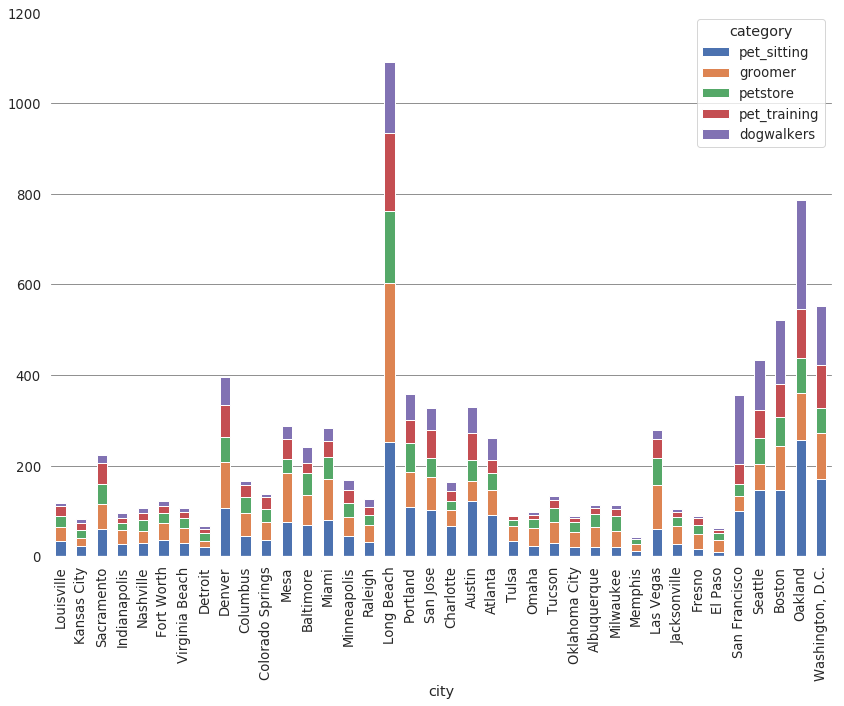

In [112]:
plt.close('all')
CityFreq2[['pet_sitting','groomer','petstore','pet_training','dogwalkers',]].plot.bar(rot=90,stacked=True,figsize=(14,10),ylim=(0,1200))
plt.grid(True, 'major', 'y', ls='-', lw=.8, c='k', alpha=.6)
plt.savefig('Categories.png',bbox_inches='tight')

### Map

#### One way to approximate the latitude and longitude of each city, instead of getting it directly, is to get the mean of the latitudes and longitudes for all the venues in the cities

In [103]:
MeanLatLondf=UniqVenOnly.groupby('city').mean()

In [104]:
#Make a simple dataframe with cites, locatioins, and groupings
MeanLatLondf['Grouping']=VenFrqDfK2[['Labels']]

In [105]:
MeanLatLondf.head()

,coordinates.latitude,coordinates.longitude,Grouping
city,,,
Albuquerque,35.149836,-106.571635,2
Atlanta,33.820313,-84.350535,1
Austin,30.502306,-97.308230,1
Baltimore,39.294787,-76.661142,0
Boston,42.336988,-71.210999,3


In [106]:
city=MeanLatLondf.index

In [107]:
#Import folium for plotting on map
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

In [108]:
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

In [109]:
from folium.features import DivIcon

#### Map the clusters to the cities by color

In [110]:
map_clusters = folium.Map(location=[39.82,-98.58], zoom_start=4)

# set color scheme for the clusters
rainbow = ('green','red','dodgerblue','darkviolet')

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(MeanLatLondf['coordinates.latitude'], MeanLatLondf['coordinates.longitude'], MeanLatLondf['Grouping']):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)

       
map_clusters

-------------
---------

## DISCUSSION <a name="discussion"></a>

The most abundant venue types for all cities but one are either groomers or pet sitters. The exception is San Francisco, where dog walker is the most abundant venues.

There is an extraordinary more than 20-fold difference between the least amount of venues per city, at 56 in Mesa, and the most, at 1238 in Long Beach. One factor to note is that Yelp does not provide all venues but only those with at least one review. Therefore, it is possible and even likely, that the numbers of venues are not entirely accurate. It seems unlikely that the large variation in venues per city could be explained completely by differences in review submission rates by city in Yelp. Given much of the data is meant to measure pet related activity, this information is still useful.

When considering where to focus business efforts, in some cases it may make sense to look for cities with the most venues by land area or population, either total or in particular categories of interest. In other cases, it may be more relevant to look for cities where a particular venue type is more abundant regardless of overall venue numbers. 

Cities could be clustered into 4 groups, with primary differences in their frequencies of groomers, pet stores, pet sitters, pet trainers, and dog walkers. Interestingly, five of the seven cities with the highest total venue number clustered together in one group when clustering was done solely on relative frequency of venue types, not total numbers. Those five cities (Boston, Oakland, San Francisco, Seattle, and Washington, D.C.) had the highest frequency of dog walkers by almost double the next highest cluster and also had a high frequency of pet sitters. Overall, pet sitters and dog walkers made up more than 50% of the pet venues in those cities. In contrast, cluster 2, which contained mostly cities in the southern half of the U.S. (with the exceptions Lincoln and Milwaukee), had groomers and pet stores making up more than 50% of their venues.

One confounding factor is that ~40% of the venues were listed under more than one category or in more than one city. This was addressed with the simplistic method of randomizing entries and saving only the first occurrence of a venue for subsequent analysis. A more thorough approach for eliminating duplications in different cities would have been to separate by zip code or latitude and longitude. Venue types were frequently linked, in that a venue listed as pet sitter was more likely to also be listed as a dog walker. Likewise, venues were often categorized as both pet stores and groomers. Further analysis could be done to characterize more fully the depth of those correlations. The randomized selecting of only one entry per venue meant that the category assigned to a venue was randomized if it had multiple categories.


----------
----------

## CONCLUSION <a name="conclusion"></a>

The cities of the United States vary a great deal in their pet related cultural characteristics. Determining the primary characteristics of different cities could be helpful for business entrepreneurs. Depending on their business objectives, they may want to focus their efforts on a particular subgroup of cities to stay within budgetary limitations.

I chose to analyze the 38 U.S. cities with populations between approximately 400,000 and 1,000,000 people where businesses could focus on a moderate market size. Using queries of pet related venues from both Foursquare and Yelp, various measures were used to classify cities. 

Several cities were regularly at the top of the lists of most active pet communities judged by rankings such as venues per person and reviews per venue. Those cities included Oakland, San Francisco, Long Beach, Seattle, and Washington, D.C.

Cities could be clustered into 4 groups, with primary differences in their frequencies of groomers, pet stores, pet sitters, pet trainers, and dog walkers. That information could be used to choose the best group of cities for the business or product one wants to launch.

---------
---------